<a href="https://colab.research.google.com/github/audyfebryantii/potato/blob/main/yolov5_potato_1m_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 17483 (delta 77), reused 29 (delta 29), pack-reused 17378 (from 4)
Receiving objects: 100% (17483/17483), 16.35 MiB | 15.56 MiB/s, done.
Resolving deltas: 100% (11988/11988), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.1/727.1 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB

In [16]:
import os
print(os.getcwd())

/content/yolov5


In [17]:
import torch
import random
import numpy as np

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

In [18]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SYLND05UAeOcirwZfGFJ")
project = rf.workspace("potato-lxebf").project("potato-coba")
version = project.version(3)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to potato-coba-3 in yolov5pytorch:: 100%|██████████| 474/474 [00:00<00:00, 10149.79it/s]


In [19]:
dataset.location

'/content/yolov5/potato-coba-3'

In [20]:
# from yolov5 import train

set_seed(42)

In [21]:
!python train.py --img 640 --batch 32 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-22 07:25:59.197299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747898759.217267    5311 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747898759.223315    5311 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/potato-coba-3/data.yaml,

In [22]:
!ls runs/train/exp3

confusion_matrix.png				    R_curve.png
events.out.tfevents.1747898792.73428bc6f414.5311.0  results.csv
F1_curve.png					    results.png
hyp.yaml					    train_batch0.jpg
labels_correlogram.jpg				    train_batch1.jpg
labels.jpg					    train_batch2.jpg
opt.yaml					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    weights


In [23]:
!python detect.py --weights runs/train/exp3/weights/best.pt --img 640 --conf 0.8 --source {dataset.location}/test/images

detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/yolov5/potato-coba-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.8, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/yolov5/potato-coba-3/test/images/DSCN7610_MOV-0002_jpg.rf.3be22fddae02b514bb50169c06b0c412.jpg: 640x640 20 potatos, 11.4ms
image 2/5 /content/yolov5/potato-coba-3/test/images/DSCN7610_MOV-0003_jpg.rf.faed7a17c505f193007f15b6a06da8ce.jpg: 640x640 20 potatos, 11.5ms
image 3/

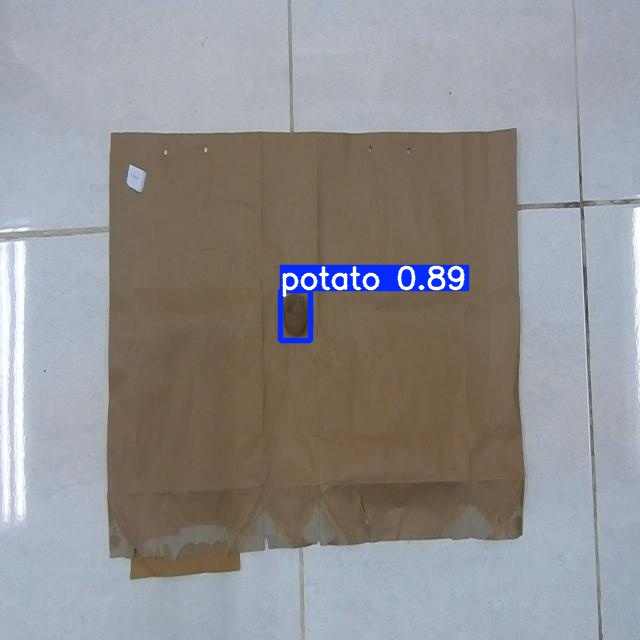

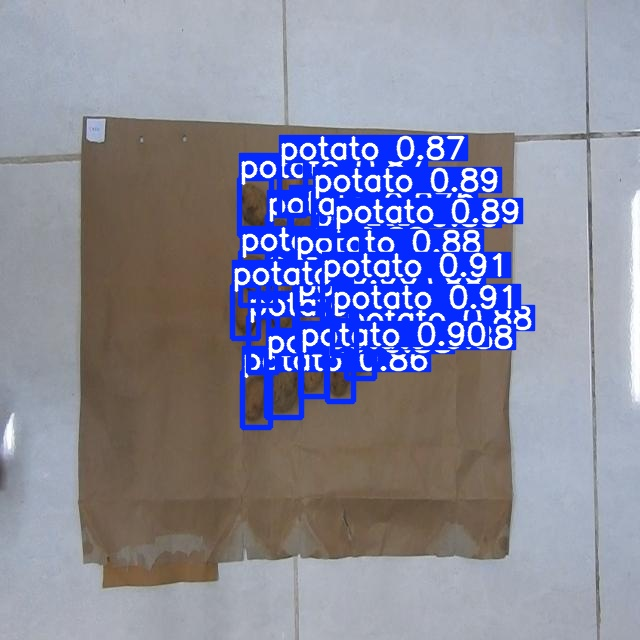

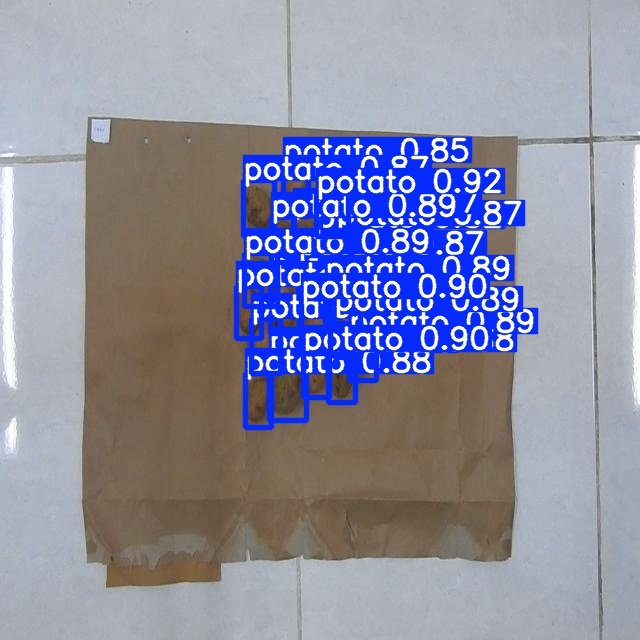

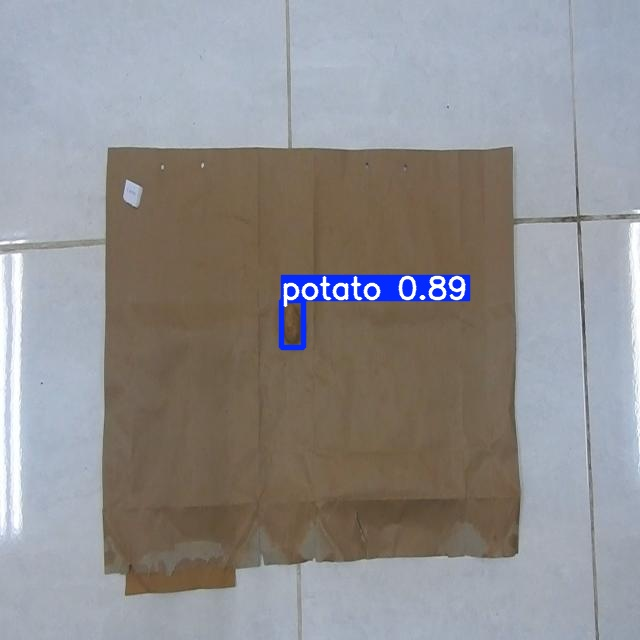

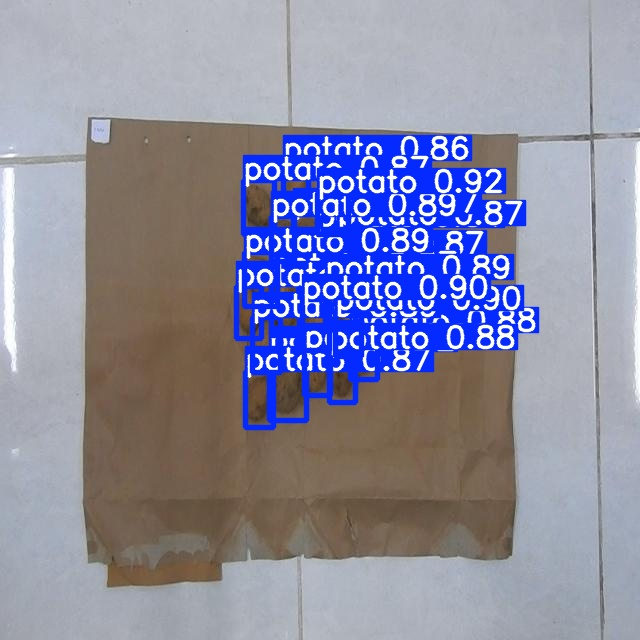

In [24]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp3/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [26]:
Result_Final_model = pd.read_csv('runs/train/exp3/results.csv')
Result_Final_model.tail(10)

epoch        train/box_loss        train/obj_loss  \
40                    40              0.035279              0.032336   
41                    41              0.034939              0.036273   
42                    42              0.032466              0.035469   
43                    43              0.031214              0.030813   
44                    44              0.034385              0.037924   
45                    45              0.033721              0.033519   
46                    46              0.033449              0.031830   
47                    47              0.032750              0.034946   
48                    48              0.031346              0.032836   
49                    49              0.032561              0.030723   

          train/cls_loss     metrics/precision        metrics/recall  \
40                     0               0.78534                   1.0   
41                     0               0.78537                   1.0   
42                     0               0.78541                   1.0   
43                     0               0.78532                   1.0   
44                     0               0.78534                   1.0   
45                     0               0.78539                   1.0   
46                     0               0.78532                   1.0   
47                     0               0.78533                   1.0   
48                     0               0.78537                   1.0   
49                     0               0.78534                   1.0   

         metrics/mAP_0.5  metrics/mAP_0.5:0.95          val/box_loss  \
40               0.82347               0.57101              0.027666   
41               0.81641               0.57703              0.026951   
42               0.82430               0.54491              0.028591   
43               0.82101               0.56583              0.027444   
44               0.82319               0.58820              0.027107   
45               0.82018               0.56657              0.027394   
46               0.82855               0.57787              0.027468   
47               0.83147               0.53049              0.030574   
48               0.83426               0.59175              0.026544   
49               0.84304               0.57380              0.028203   

            val/obj_loss          val/cls_loss                 x/lr0  \
40              0.022678                     0              0.002278   
41              0.022711                     0              0.002080   
42              0.022533                     0              0.001882   
43              0.022535                     0              0.001684   
44              0.022360                     0              0.001486   
45              0.022564                     0              0.001288   
46              0.022436                     0              0.001090   
47              0.022736                     0              0.000892   
48              0.022217                     0              0.000694   
49              0.022543                     0              0.000496   

                   x/lr1                 x/lr2  
40              0.002278              0.002278  
41              0.002080              0.002080  
42              0.001882              0.001882  
43              0.001684              0.001684  
44              0.001486              0.001486  
45              0.001288              0.001288  
46              0.001090              0.001090  
47              0.000892              0.000892  
48              0.000694              0.000694  
49              0.000496              0.000496

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('runs/train/exp3/results.csv')

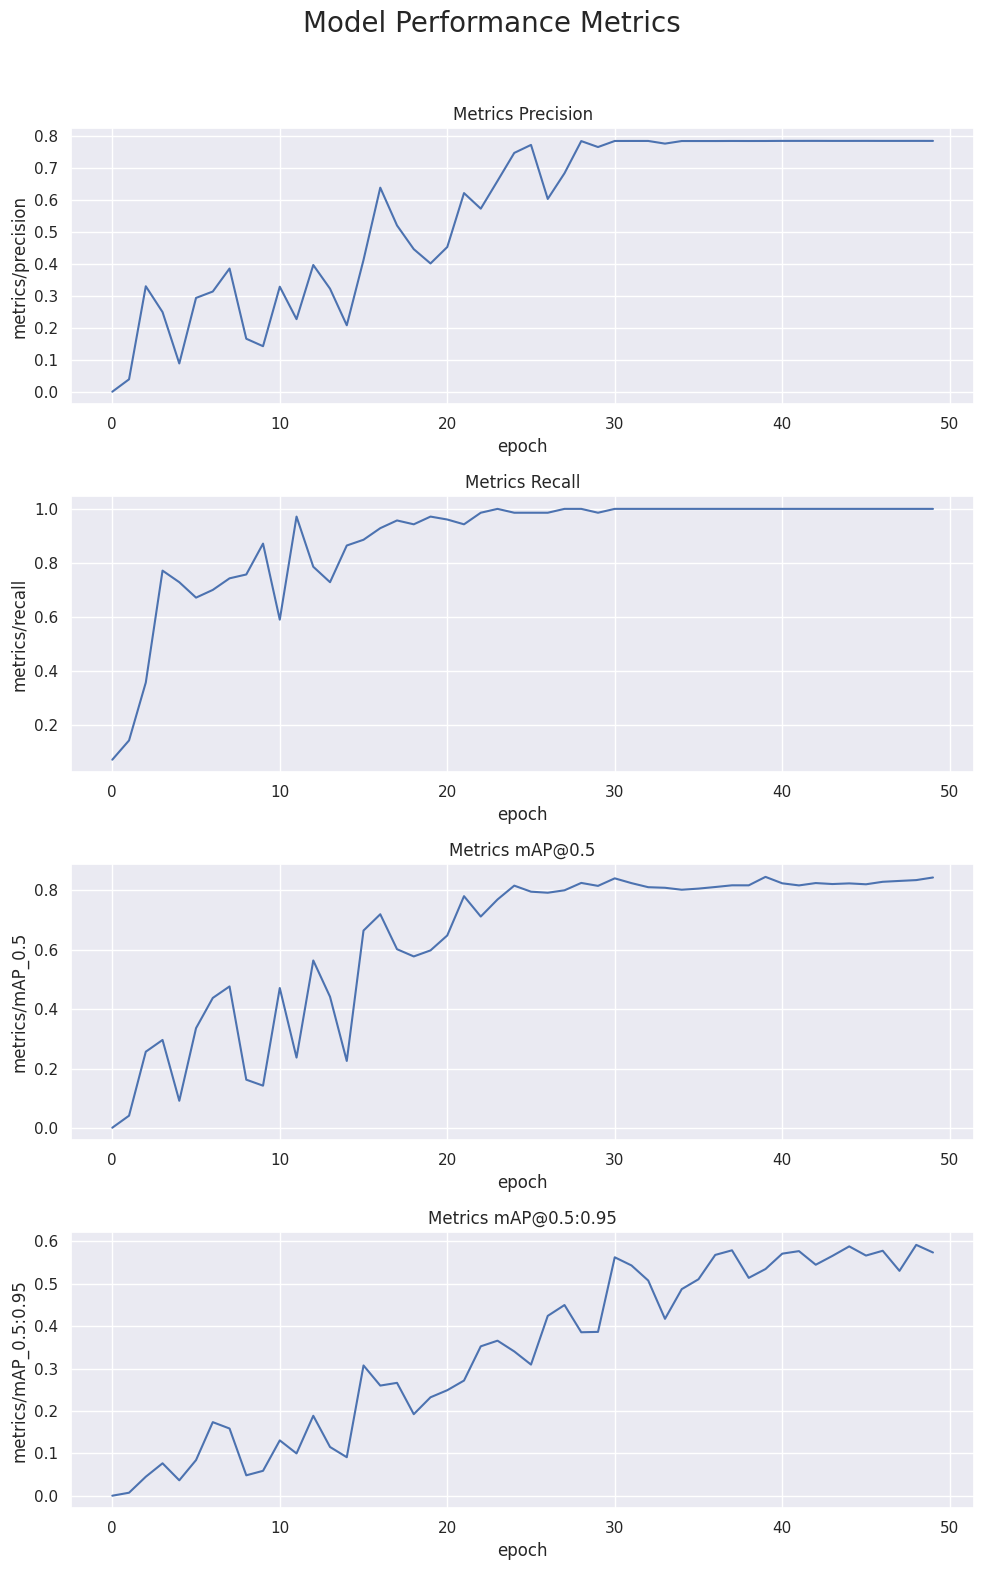

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#Strip any leading or trailing whitespace from the column names
df.columns = df.columns.str.strip()

#Create subplots with 4 rows and 1 column
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,16))

# Plot the selected metric columns
sns.lineplot(x='epoch', y='metrics/precision', data=df, ax=axs[0])
axs[0].set(title="Metrics Precision")

sns.lineplot(x='epoch', y='metrics/recall', data=df, ax=axs[1])
axs[1].set(title="Metrics Recall")

sns.lineplot(x='epoch', y='metrics/mAP_0.5', data=df, ax=axs[2])
axs[2].set(title="Metrics mAP@0.5")

sns.lineplot(x='epoch', y='metrics/mAP_0.5:0.95', data=df, ax=axs[3])
axs[3].set(title="Metrics mAP@0.5:0.95")

#Overall figure title and layout adjustment
plt.suptitle('Model Performance Metrics', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [32]:
!python detect.py --weights runs/train/exp3/weights/best.pt --img 640 --conf 0.5 --source /content/DSCN7583.JPG

detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/DSCN7583.JPG, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/DSCN7583.JPG: 480x640 16 potatos, 28.7ms
Speed: 0.6ms pre-process, 28.7ms inference, 118.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


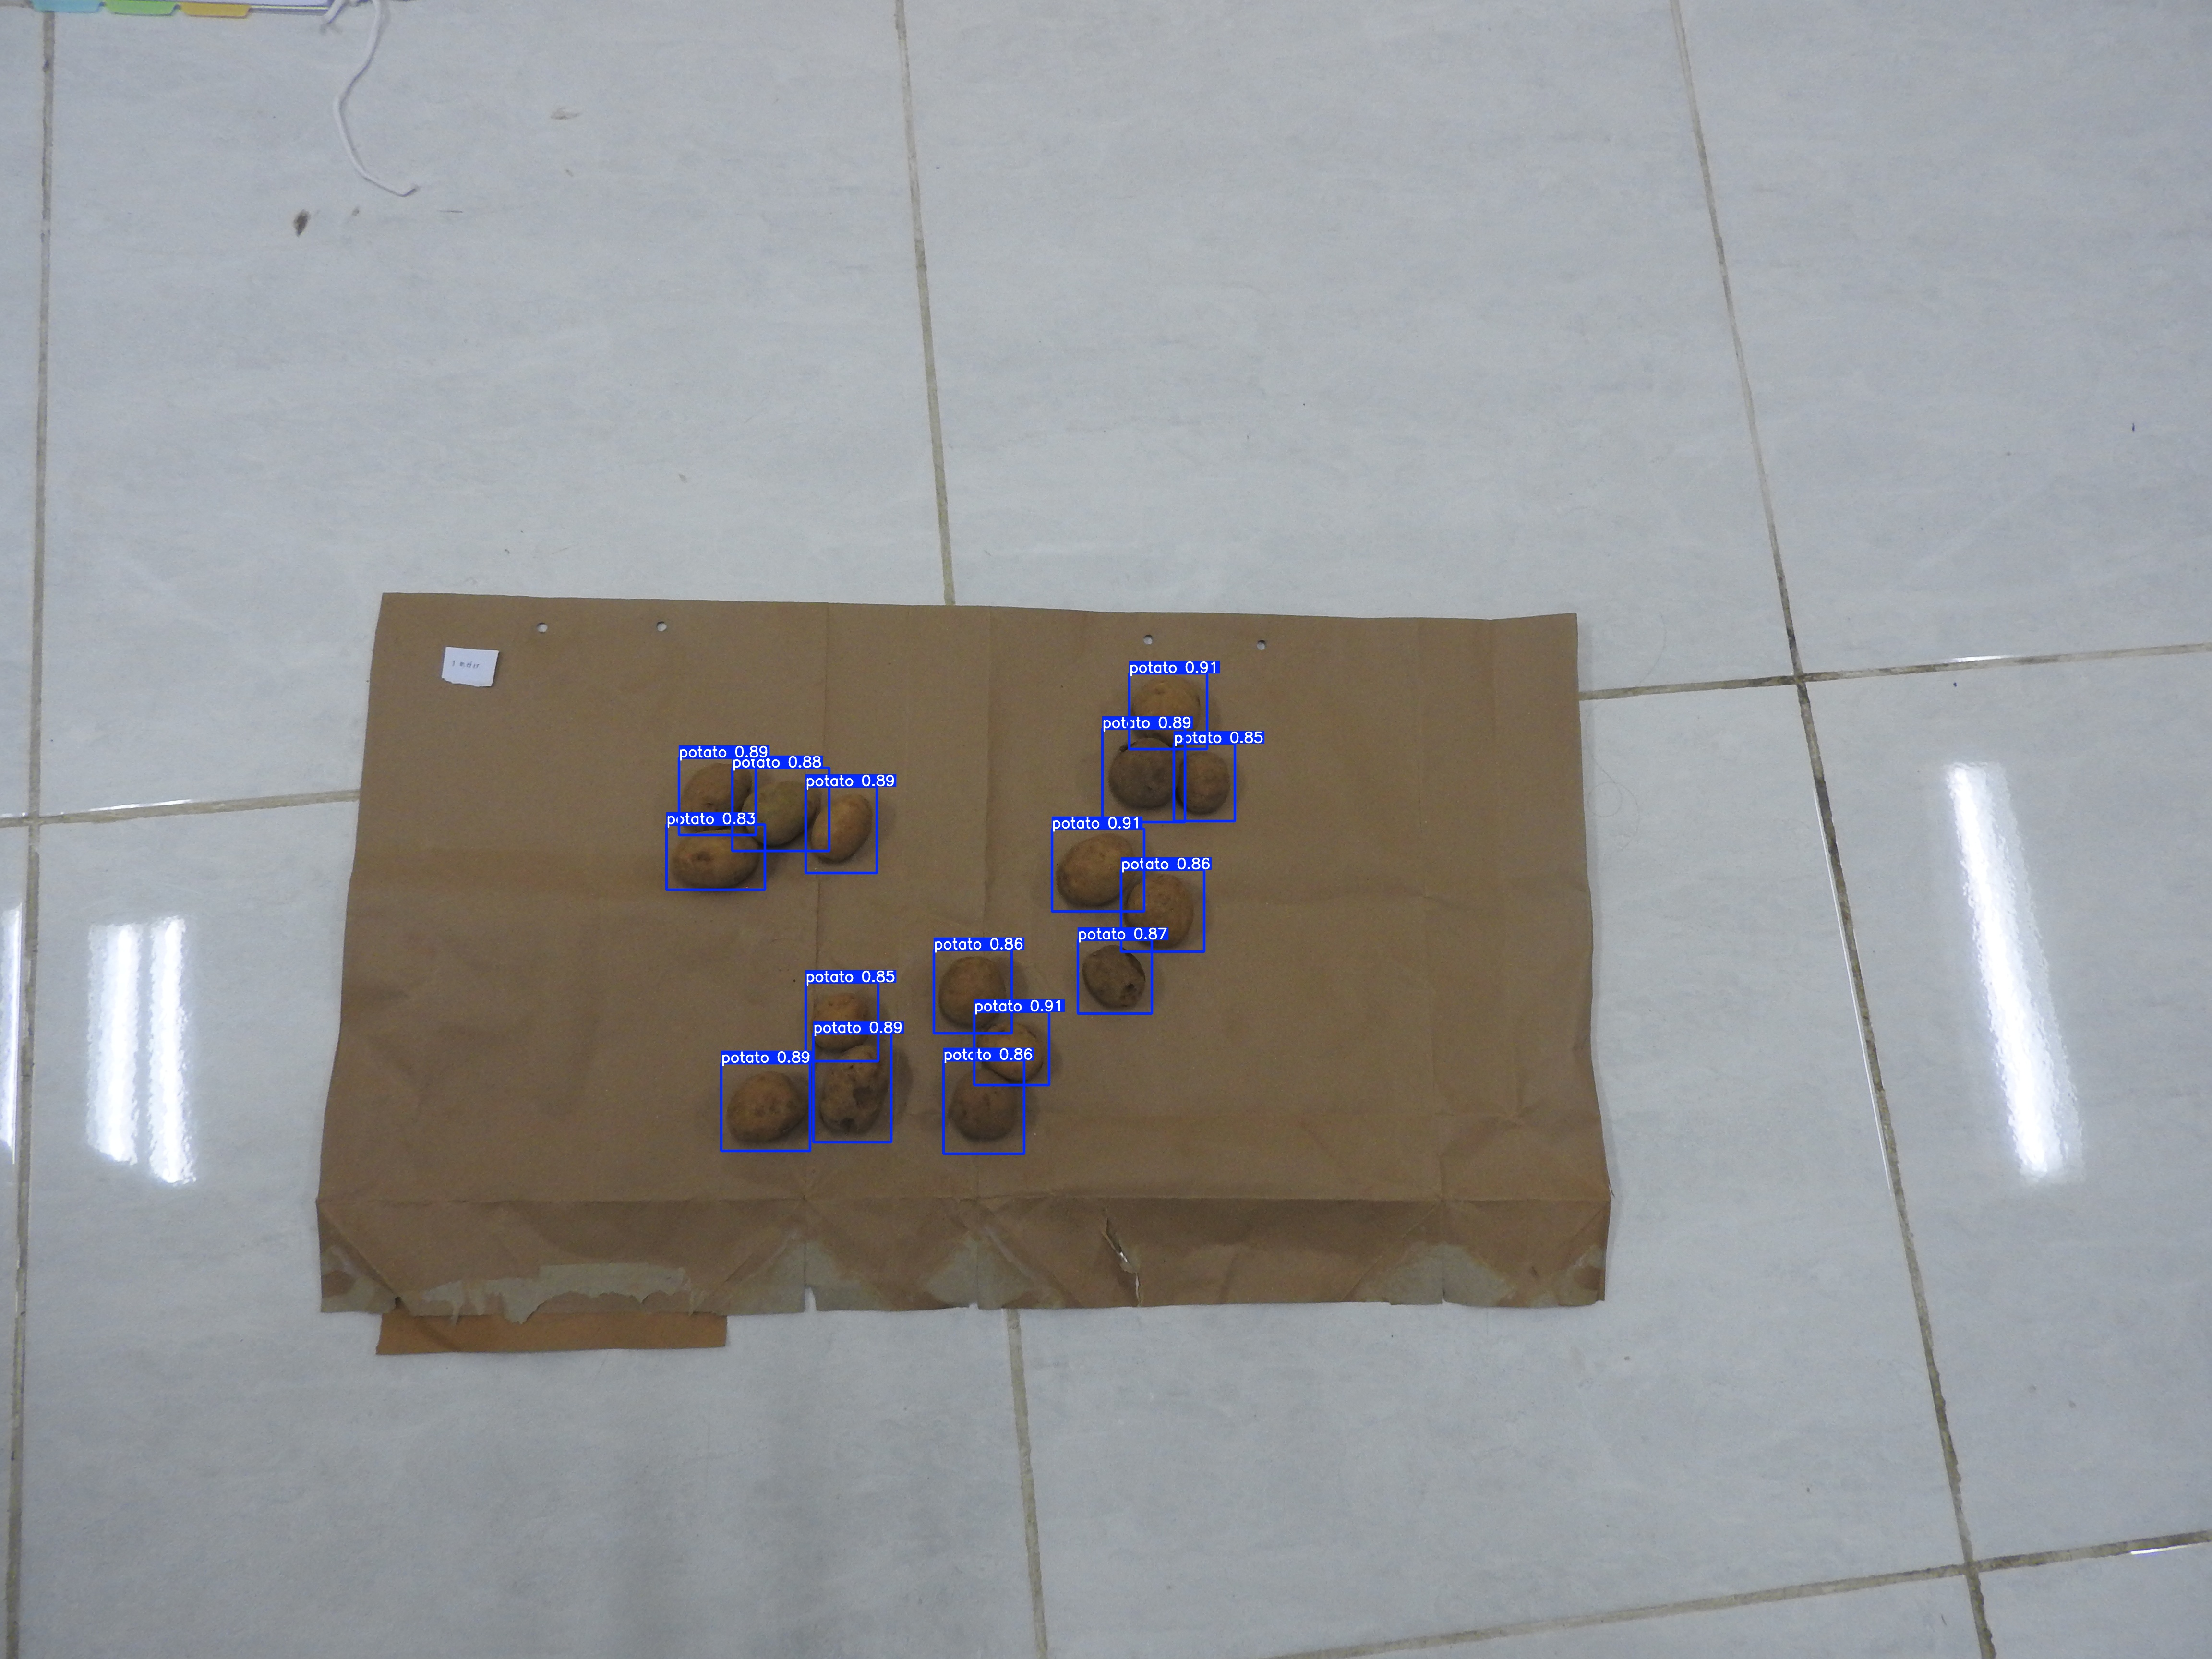

In [35]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp6/*.JPG'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")